Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 6s 106us/sample - loss: 1.6986 - accuracy: 0.5794 - val_loss: 0.9695 - val_accuracy: 0.7150
Epoch 2/10
55000/55000 [==============================] - 6s 102us/sample - loss: 0.8006 - accuracy: 0.7468 - val_loss: 0.6908 - val_accuracy: 0.7796
Epoch 3/10
55000/55000 [==============================] - 5s 98us/sample - loss: 0.6434 - accuracy: 0.7789 - val_loss: 0.6029 - val_accuracy: 0.7894
Epoch 4/10
55000/55000 [==============================] - 6s 100us/sample - loss: 0.5924 - accuracy: 0.7959 - val_loss: 0.5611 - val_accuracy: 0.8116
Epoch 5/10
55000/55000 [==============================] - 6s 100us/sample - loss: 0.5660 - accuracy: 0.8047 - val_loss: 0.5627 - val_accuracy: 0.8096
Epoch 6/10
55000/55000 [==============================] - 5s 100us/sample - loss: 0.5547 - accuracy: 0.8088 - val_loss: 0.5379 - val_accuracy: 0.8148
Epoch 7/10
55000/55000 [============================

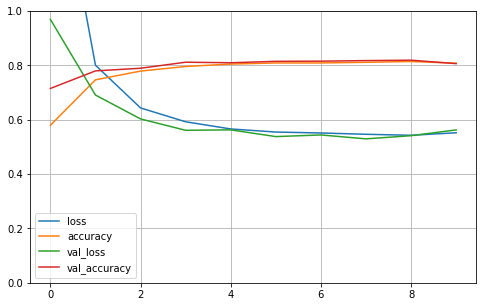

In [7]:
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import os
import sys

#定义展示函数
def plot_learning_curvers(history):
    pd.DataFrame(history.history).plot(figsize = (8,5))
    #显示网格
    plt.grid(True)
    #设置y坐标轴范围
    plt.gca().set_ylim(0,1)
    plt.show()
    
#定义训练数据和验证数据
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all,y_train_all),(x_test,y_test) = fashion_mnist.load_data()
x_valid,x_train = x_train_all[:5000],x_train_all[5000:]
y_valid,y_train = y_train_all[:5000],y_train_all[5000:]

#定义一个层的线性叠加模型。
model = tf.keras.models.Sequential()
#趋于平缓的输入。不影响批大小。添加一个输入层
model.add(tf.keras.layers.Flatten(input_shape = [28,28]))
#添加一个全连接层 用到了 sigmoid激活函数 应用sigmoid激活函数。
#sigmoid函数定义为1 / (1 + exp(-x))。它的曲线像一个“S”，就像平滑版的
#Heaviside(单位阶跃函数)函数。对于较小的值(<-5)，sigmoid返回一个接近于0的值，
#对于较大的值(>5)，函数的结果接近于1。Sigmoid等价于一个2元素的Softmax，其中第二个元素被假定为0。

model.add(tf.keras.layers.Dense(300,activation = "sigmoid"))

model.add(tf.keras.layers.Dense(100,activation = "sigmoid"))
#定义输出层  把输出结果 统一为概率
#softmax函数：也是一种sigmoid函数，但它在处理分类问题时很方便。
#sigmoid函数只能处理两个类。当我们想要处理多个类时，该怎么办呢？只对单类进行“是”或“不是”的分类方式将不会有任何帮助。
#softmax函数将压缩每个类在0到1之间，并除以输出总和。它实际上可以表示某个类的输入概率。
model.add(tf.keras.layers.Dense(300,activation = "softmax"))

#配置培训模型 loss 字符串(目标函数的名称)、目标函数或tf.loss。损失的实例。看到tf.losses。如果模型有多个输出，
#您可以通过传递字典或损失列表，在每个输出上使用不同的损失。由模型最小化的损失值将是所有个人损失的总和。
#optimizers优化器，可以是优化器名称，也可以是实例，优化器来自tf.keras.optimizers.sgd随机梯度下降和动量优化
#metrics计算标签和 预测匹配的频率
model.compile(loss = "sparse_categorical_crossentropy",optimizer = "sgd",metrics = ["accuracy"])
#开始训练
history = model.fit(x_train,y_train,epochs=10,validation_data = (x_valid,y_valid))

# history.history()

plot_learning_curvers(history)


    
    